# $\color{#0080c0}{\text{Student Performance Indicators}}$
## $\color{#0080c0}{\text{Exploratory Data Analysis}}$

### $\color{#ff8346}{\text{The life cycle of a data science project:}}$

- **Problem Definition**

- **Data Collection**

- **Data Check**

- **Data Exploration and Visualization**

- **Data Preparation**

- **Model Development**

- **Training & Evaluation**

### 1/ Problem Definition

- The objective of this project is to explore the impact of various factors, including gender, ethnicity, parental level of education, lunch, and test preparation course on students' performance, specifically their test scores. 
- The project aims to understand how these variables influence to ultimately determine the students' academic achievements.

### 2/ Data Collection

- Data Source : https://www.kaggle.com/datasets/spscientist/students-performance-in-exams?datasetId=74977

- Content : 
  - This dataset consists of the marks secured by the students in various subjects.
  - It consists of 8 columns and 1000 rows

### 2.1/ Importing data & required packages

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
import warnings
warnings.filterwarnings('ignore')

In [2]:
df = pd.read_csv('StudentsPerformance.csv')

In [3]:
df.head()

,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score
0,female,group B,bachelor's degree,standard,none,72,72,74
1,female,group C,some college,standard,completed,69,90,88
2,female,group B,master's degree,standard,none,90,95,93
3,male,group A,associate's degree,free/reduced,none,47,57,44
4,male,group C,some college,standard,none,76,78,75


In [4]:
df.shape

(1000, 8)

### 2.2/ Dataset Content :

The dataset contains information about students and their performance in exams. It includes the following columns:

1. **Gender**: indicates the gender of the student, with values : "male" and "female."

2. **Race/Ethnicity**: categorize students based on their racial or ethnic background, with values : "group A", "group B", "group C", "group D" and "group E".

3. **Parental Level of Education**: describes the highest level of education attained by the student's parents or guardians. Categories include : bachelor's degree, some college, master's degree, associate's degree, high school.

4. **Lunch**: specifies the type of lunch the student receives, which could be "standard" or "free/reduced."

5. **Test Preparation Course**: indicates whether the student completed a test preparation course, with values : "none" or "completed."

6. **Math Score**: The score a student received in a math exam.

7. **Reading Score**: The score a student received in a reading exam.

8. **Writing Score**: The score a student received in a writing exam.

### 3/Data Check & Cleaning

- Data Integrity : 
  - Check Missing values
  - Check data type
  - Check the number of unique values of each column
- Data Consistency:
  - Check Duplicates
  - Check various categories present in the different categorical column
- Statistics of dataset

### 3.1/ Data Integrity

In [5]:
# Checking Missing values
df.isna().sum()

gender                         0
race/ethnicity                 0
parental level of education    0
lunch                          0
test preparation course        0
math score                     0
reading score                  0
writing score                  0
dtype: int64

#### There are no missing values in the data set

In [6]:
# Checking data types
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 8 columns):
 #   Column                       Non-Null Count  Dtype 
---  ------                       --------------  ----- 
 0   gender                       1000 non-null   object
 1   race/ethnicity               1000 non-null   object
 2   parental level of education  1000 non-null   object
 3   lunch                        1000 non-null   object
 4   test preparation course      1000 non-null   object
 5   math score                   1000 non-null   int64 
 6   reading score                1000 non-null   int64 
 7   writing score                1000 non-null   int64 
dtypes: int64(3), object(5)
memory usage: 62.6+ KB


In [7]:
# Checking the number of unique values of each column
df.nunique()

gender                          2
race/ethnicity                  5
parental level of education     6
lunch                           2
test preparation course         2
math score                     81
reading score                  72
writing score                  77
dtype: int64

### 3.2/ Data Consistency

In [7]:
# Checking Duplicates
df.duplicated().sum()

0

#### There are no duplicates  values in the data set

In [8]:
# Checking various categories present in the different categorical column
df.head()

,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score
0,female,group B,bachelor's degree,standard,none,72,72,74
1,female,group C,some college,standard,completed,69,90,88
2,female,group B,master's degree,standard,none,90,95,93
3,male,group A,associate's degree,free/reduced,none,47,57,44
4,male,group C,some college,standard,none,76,78,75


In [9]:
print("Categories in 'gender' variable: ", df['gender'].unique())

print("Categories in 'race/ethnicity' variable:  ", df['race/ethnicity'].unique())

print("Categories in 'parental level of education': ", df['parental level of education'].unique())

print("Categories in 'lunch' variable: ", df['lunch'].unique())

print("Categories in 'test preparation course' variable: ", df['test preparation course'].unique())

Categories in 'gender' variable:  ['female' 'male']
Categories in 'race/ethnicity' variable:   ['group B' 'group C' 'group A' 'group D' 'group E']
Categories in 'parental level of education':  ["bachelor's degree" 'some college' "master's degree" "associate's degree"
 'high school' 'some high school']
Categories in 'lunch' variable:  ['standard' 'free/reduced']
Categories in 'test preparation course' variable:  ['none' 'completed']


In [10]:
numerical_features = [feature for feature in df.columns if df[feature].dtype != 'O']
categorical_features = [feature for feature in df.columns if df[feature].dtype == 'O']

print('There are {} numerical features: {}'.format(len(numerical_features), numerical_features))
print('\nThere are {} categorical features: {}'.format(len(categorical_features), categorical_features))

There are 3 numerical features: ['math score', 'reading score', 'writing score']

There are 5 categorical features: ['gender', 'race/ethnicity', 'parental level of education', 'lunch', 'test preparation course']


#### Adding columns for "Total Score" and "Average"

In [11]:
df['total score'] = df['math score'] + df['reading score'] + df['writing score']
df['average'] = df['total score']/3

In [12]:
df.sample(4)

,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score,total score,average
529,female,group C,associate's degree,standard,none,62,74,70,206,68.666667
316,female,group D,master's degree,standard,completed,77,82,91,250,83.333333
575,male,group A,associate's degree,free/reduced,completed,40,55,53,148,49.333333
511,male,group A,some high school,standard,none,64,50,43,157,52.333333


In [13]:
reading_full = df[df['reading score'] == 100]['average'].count()
writing_full = df[df['writing score'] == 100]['average'].count()
math_full = df[df['math score'] == 100]['average'].count()

print('Number of students with full marks in Maths:', math_full)
print('Number of students with full marks in Writing:', writing_full)
print('Number of students with full marks in Reading:', reading_full)

Number of students with full marks in Maths: 7
Number of students with full marks in Writing: 14
Number of students with full marks in Reading: 17


In [14]:
reading_less_20 = df[df['reading score'] <= 20]['average'].count()
writing_less_20 = df[df['writing score'] <= 20]['average'].count()
math_less_20 = df[df['math score'] <= 20]['average'].count()

print('Number of students with less than 20 marks in Maths:', math_less_20)
print('Number of students with less than 20 marks in Writing:', writing_less_20)
print('Number of students with less than 20 marks in Reading:', reading_less_20)

Number of students with less than 20 marks in Maths: 4
Number of students with less than 20 marks in Writing: 3
Number of students with less than 20 marks in Reading: 1


#####  Insights
 - Very small number of students in the dataset achieved full marks in the exams
 - Small proportion of students received extremely low scores (less than 20%) in these exams
 - Students have performed the worst in Maths 
 - Best performance is in reading section

### 3.3/ Statistics of dataset

In [15]:
df.describe()

,math score,reading score,writing score,total score,average
count,1000.00000,1000.000000,1000.000000,1000.000000,1000.000000
mean,66.08900,69.169000,68.054000,203.312000,67.770667
std,15.16308,14.600192,15.195657,42.771978,14.257326
min,0.00000,17.000000,10.000000,27.000000,9.000000
25%,57.00000,59.000000,57.750000,175.000000,58.333333
50%,66.00000,70.000000,69.000000,205.000000,68.333333
75%,77.00000,79.000000,79.000000,233.000000,77.666667
max,100.00000,100.000000,100.000000,300.000000,100.000000


#### Insight

- The means of exams are very close to each other

- The standard deviations of exams are also close to each other

- Minimum score for math is 0, for writing is much higher : 10 and for reading is higher that both exams : 17

- The 25th percentile math score is 57, meaning that 25% of the students scored 57 or lower in math.

- The median reading score is 70, which suggests that half of the students scored 70 or higher in reading.

- The 75th percentile writing score is 79, indicating that 25% of the students scored 79 or higher in writing.

### 4/ Data Exploration and Visualization

### 4.1/ Average score distribution 

#### Histogram & Kernel Distribution Function (KDE)

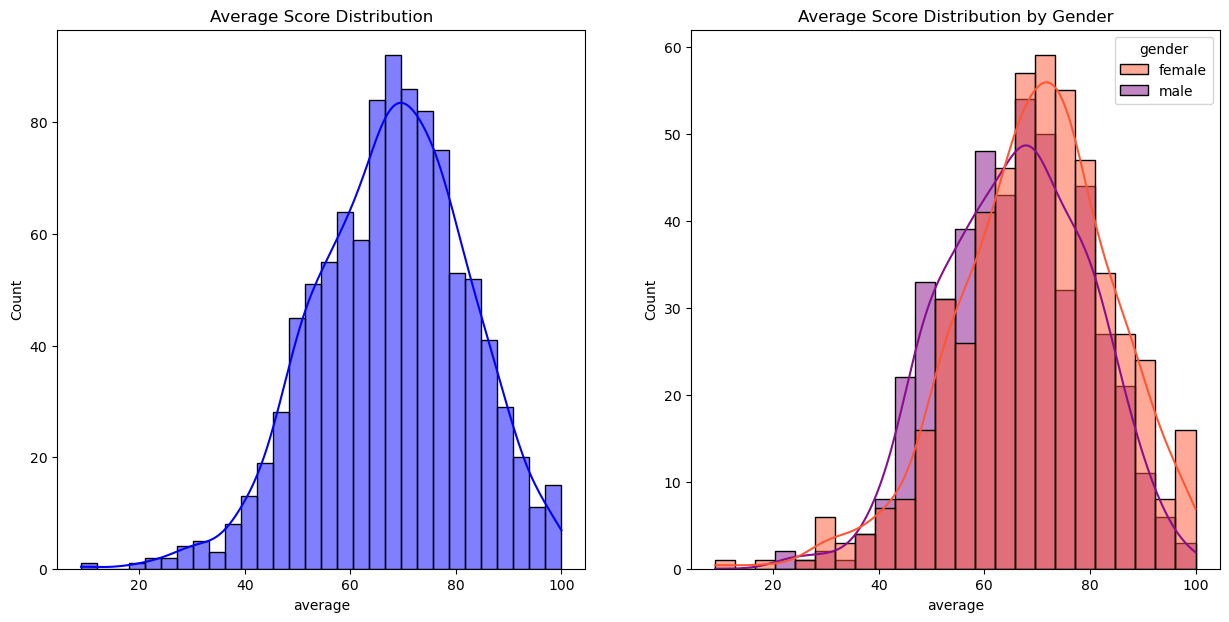

In [16]:
custom_palette = ["#FF5733", "#870e8d"]

fig, axs = plt.subplots(1, 2, figsize=(15, 7))
plt.subplot(121)
sns.histplot(data=df, x='average', bins=30, kde=True, color='b')
plt.title("Average Score Distribution")

plt.subplot(122)
sns.histplot(data=df, x='average', kde=True, hue='gender', palette=custom_palette)
plt.title("Average Score Distribution by Gender")
plt.show()

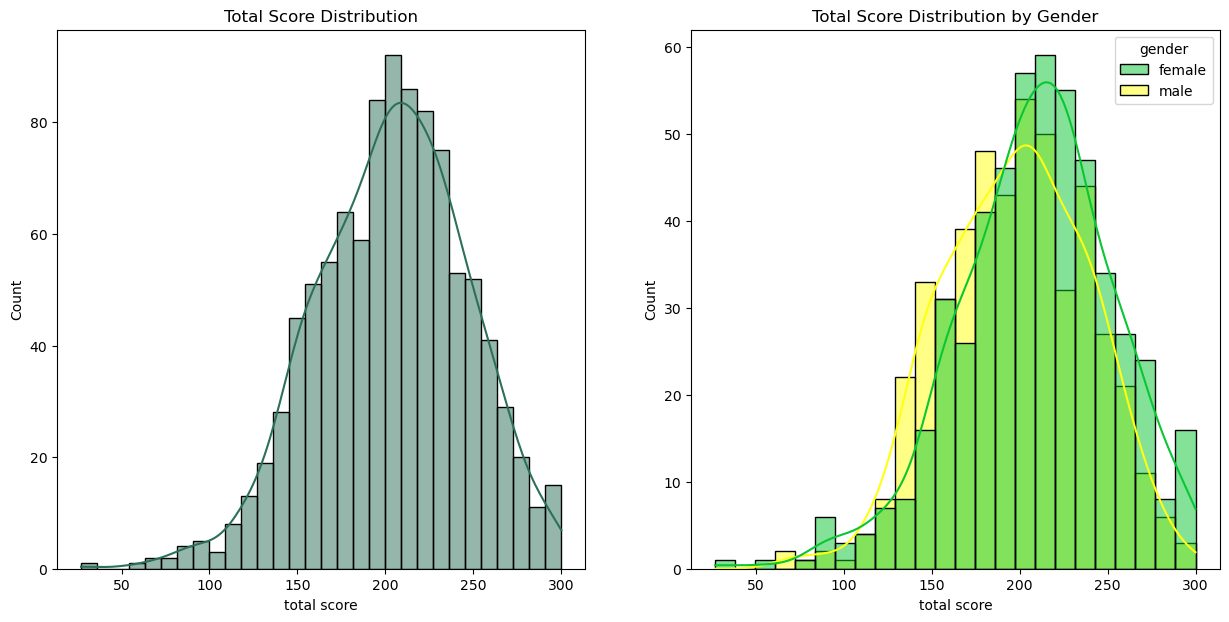

In [17]:
fig, axs = plt.subplots(1, 2, figsize=(15, 7))
plt.subplot(121)
sns.histplot(data=df, x='total score', bins=30, kde=True, color='#2c7059')
plt.title("Total Score Distribution")

plt.subplot(122)
sns.histplot(data=df, x='total score', kde=True, hue='gender', palette=["#09c633", "#ffff0f"])
plt.title("Total Score Distribution by Gender")
plt.show()

#####  Insights
- Female students tend to perform well then male students.

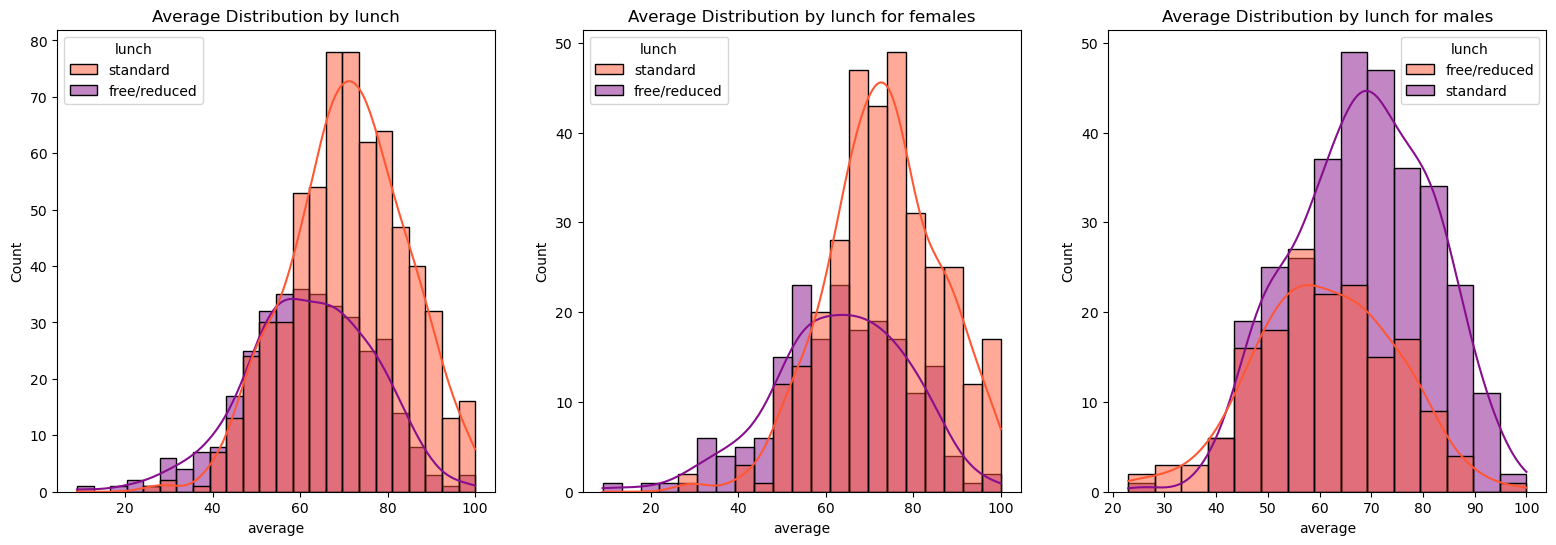

In [18]:
plt.subplots(1,3,figsize=(26,6))
plt.subplot(141)
sns.histplot(data=df, x='average', kde=True, hue='lunch', palette=custom_palette)
plt.title("Average Distribution by lunch")

plt.subplot(142)
sns.histplot(data=df[df.gender=='female'], x='average', kde=True, hue='lunch', palette=custom_palette )
plt.title("Average Distribution by lunch for females")

plt.subplot(143)
sns.histplot(data=df[df.gender=='male'], x='average', kde=True, hue='lunch', palette=custom_palette)
plt.title("Average Distribution by lunch for males")
plt.show()

#####  Insights

- The students who receive standard lunch perform well in exams.

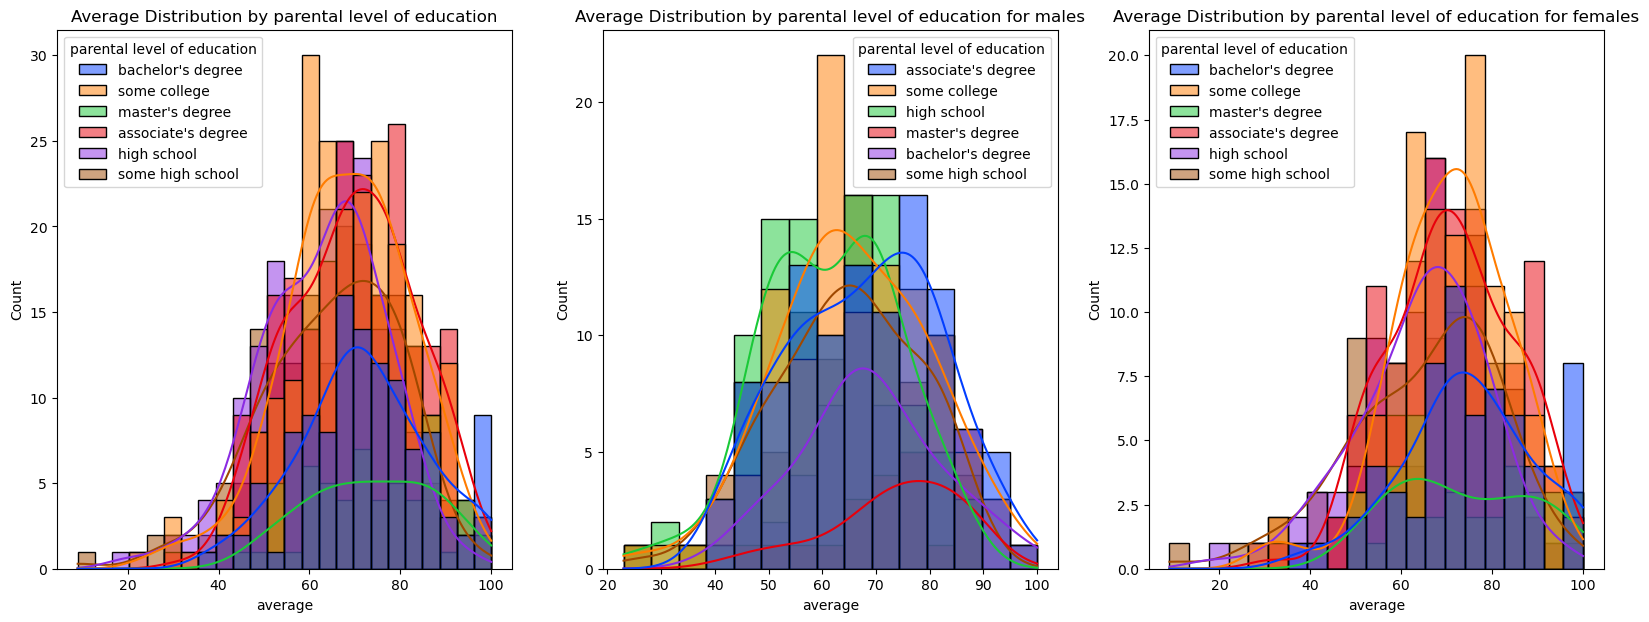

In [19]:
plt.subplots(1,3,figsize=(27,7))
plt.subplot(141)
ax =sns.histplot(data=df, x='average', kde=True, hue='parental level of education', palette ="bright")
plt.title("Average Distribution by parental level of education")

plt.subplot(142)
ax =sns.histplot(data=df[df.gender=='male'], x='average', kde=True, hue='parental level of education', palette ="bright")
plt.title("Average Distribution by parental level of education for males")

plt.subplot(143)
ax =sns.histplot(data=df[df.gender=='female'], x='average', kde=True, hue='parental level of education', palette ="bright")
plt.title("Average Distribution by parental level of education for females")

plt.show()

#####  Insights

- In general, there is no effect of parent's education on students performance
- Male child for parent's whose education is of associate's degree tend to perform well in exam

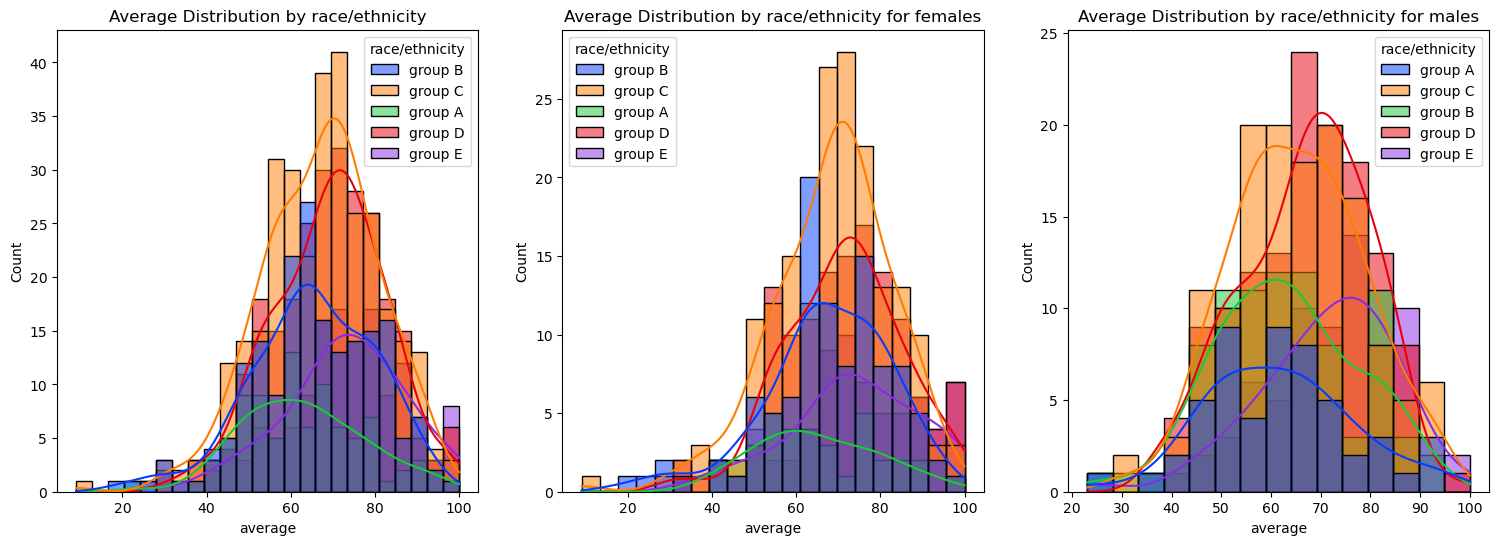

In [20]:
plt.subplots(1,3,figsize=(25,6))
plt.subplot(141)
ax =sns.histplot(data=df,x='average',kde=True,hue='race/ethnicity', palette= 'bright')
plt.title("Average Distribution by race/ethnicity")

plt.subplot(142)
ax =sns.histplot(data=df[df.gender=='female'],x='average',kde=True,hue='race/ethnicity', palette= 'bright')
plt.title("Average Distribution by race/ethnicity for females")

plt.subplot(143)
ax =sns.histplot(data=df[df.gender=='male'],x='average',kde=True,hue='race/ethnicity', palette= 'bright')
plt.title("Average Distribution by race/ethnicity for males")

plt.show()

#####  Insights

- Students of group A and group B tends to perform poorly in exam.

### 4.2/ Maximumum score of students in all three subjects

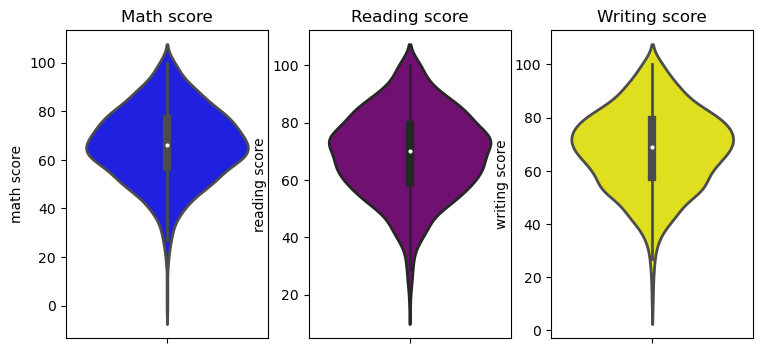

In [21]:
plt.figure(figsize=(12,4))
plt.subplot(1, 4, 1)
plt.title('Math score')
sns.violinplot(y='math score',data=df,color='blue',linewidth=2)

plt.subplot(1, 4, 2)
plt.title('Reading score')
sns.violinplot(y='reading score',data=df,color='purple',linewidth=2)

plt.subplot(1, 4, 3)
plt.title('Writing score')
sns.violinplot(y='writing score',data=df,color='yellow',linewidth=2)
plt.show()

#### Insights

- Most of students get between 60 and 80 in mathematics, while in reading and writing most of students get between 50 and 80

### 4.3/ Multivariate analysis

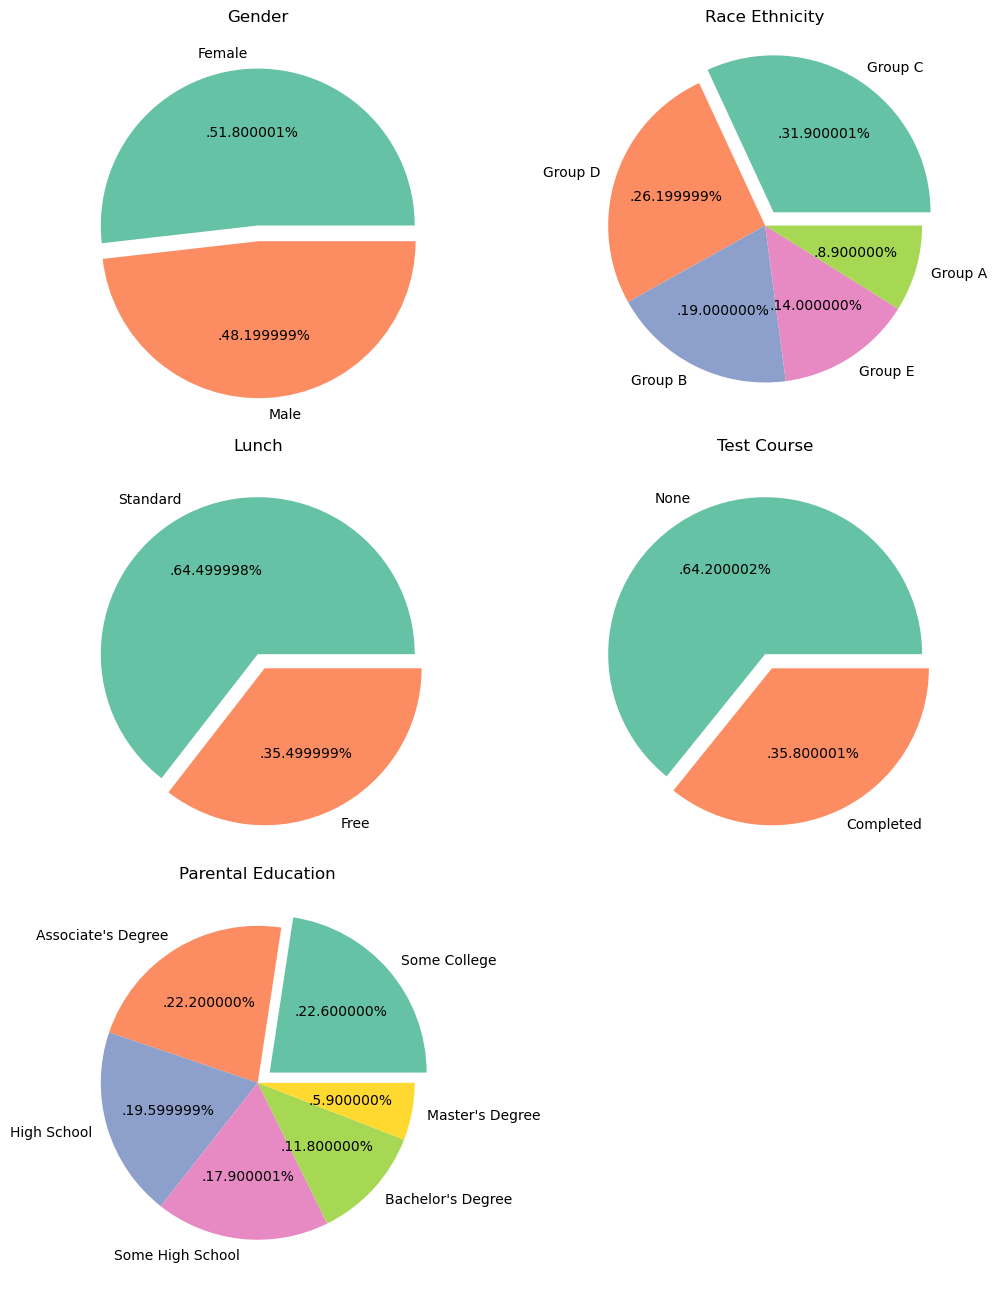

In [22]:
plt.rcParams['figure.figsize'] = (10, 13)

plt.subplot(3, 2, 1)
size = df['gender'].value_counts()
labels = 'Female', 'Male'
plt.pie(size, colors = sns.color_palette('Set2'), labels = labels, explode=[0,0.1], autopct = '.%2f%%')
plt.title('Gender', fontsize = 12)
plt.axis('off')

plt.subplot(3, 2, 2)
size = df['race/ethnicity'].value_counts()
labels = 'Group C', 'Group D','Group B','Group E','Group A'
plt.pie(size, colors = sns.color_palette('Set2'), labels = labels,explode=[0.1,0,0,0,0], autopct = '.%2f%%')
plt.title('Race Ethnicity', fontsize = 12)
plt.axis('off')

plt.subplot(3, 2, 3)
size = df['lunch'].value_counts()
labels = 'Standard', 'Free'
plt.pie(size, colors = sns.color_palette('Set2'), labels = labels,explode=[0,0.1], autopct = '.%2f%%')
plt.title('Lunch', fontsize = 12)
plt.axis('off')

plt.subplot(3, 2, 4)
size = df['test preparation course'].value_counts()
labels = 'None', 'Completed'
plt.pie(size, colors = sns.color_palette('Set2'), labels = labels,explode=[0,0.1], autopct = '.%2f%%')
plt.title('Test Course', fontsize = 12)
plt.axis('off')

plt.subplot(3, 2, 5)
size = df['parental level of education'].value_counts()
labels = 'Some College', "Associate's Degree",'High School','Some High School',"Bachelor's Degree","Master's Degree"
plt.pie(size, colors = sns.color_palette('Set2'), labels = labels, explode=[0.1,0,0,0,0,0], autopct = '.%2f%%')
plt.title('Parental Education', fontsize = 12)
plt.axis('off')

plt.tight_layout()
plt.grid()
plt.show()

#####  Insights
- Number of Male and Female students is almost equal
- Number students are greatest in Group C
- Number of students who have standard lunch are greater
- Number of students who have not completed the test preparation course is greater
- Number of students whose parental education is "Some College" is greater followed by "Associate's Degree" and "High School"

### 4.4/ Feature Visualization

#### How is distribution of Gender ?

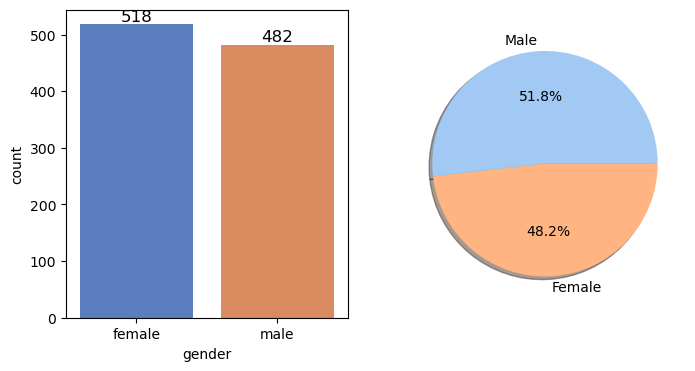

In [23]:
f,ax=plt.subplots(1,2,figsize=(8,4))
sns.countplot(x=df['gender'], data=df, palette='muted', ax=ax[0])
for c in ax[0].containers:
    ax[0].bar_label(c, color='black', size=12)
plt.pie(x=df['gender'].value_counts(), labels=['Male','Female'], autopct='%1.1f%%', shadow=True, colors=sns.color_palette('pastel'))
plt.show()

#### Insights 
- Gender has balanced data with female students are 518 (48%) and male students are 482 (52%) 

#### Is gender has any impact on student's performance ?

In [24]:
gender_group = df.groupby('gender').mean()
gender_group

,math score,reading score,writing score,total score,average
gender,,,,,
female,63.633205,72.608108,72.467181,208.708494,69.569498
male,68.728216,65.473029,63.311203,197.512448,65.837483


#### Insights 
- On an average females have a better overall score than men.
- whereas males have scored higher in Maths.

#### How is Group distribution ?

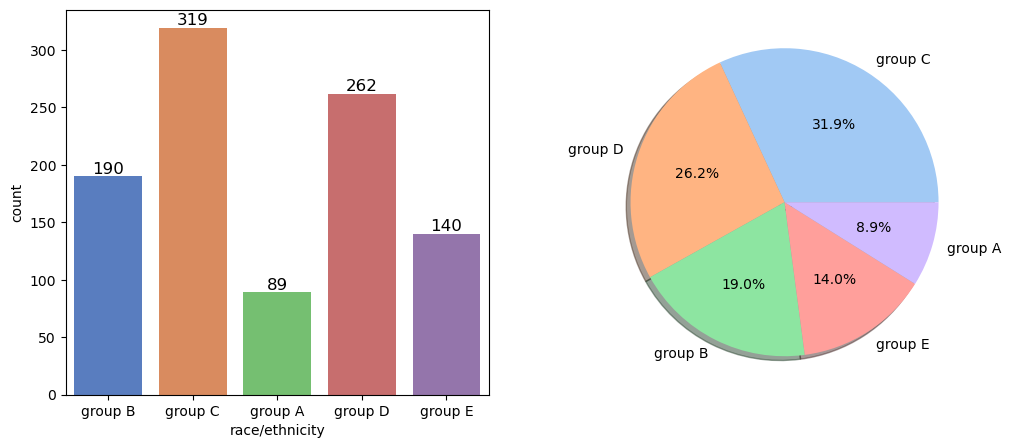

In [25]:
f,ax=plt.subplots(1,2,figsize=(12,5))
sns.countplot(x=df['race/ethnicity'], data=df, palette='muted', ax=ax[0])
for c in ax[0].containers:
    ax[0].bar_label(c, color='black', size=12)
plt.pie(x=df['race/ethnicity'].value_counts(), labels=df['race/ethnicity'].value_counts().index, autopct='%1.1f%%', shadow=True, colors=sns.color_palette('pastel'))
plt.show()

#### Insights 
- Most of the student are from group C and group D.
- Lowest number of students belong to group A.

#### Is Race/Ehnicity has any impact on student's performance ?

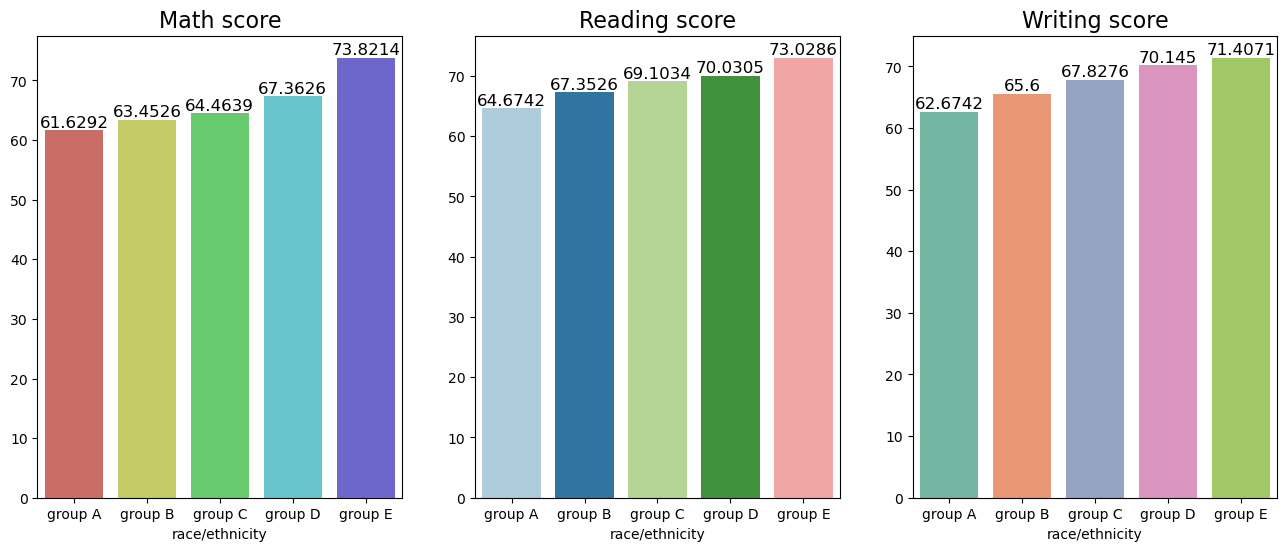

In [26]:
Group_data2= df.groupby('race/ethnicity')
f,ax=plt.subplots(1,3,figsize=(16,6))
sns.barplot(x=Group_data2['math score'].mean().index, y=Group_data2['math score'].mean().values, palette = sns.color_palette("hls"), ax=ax[0])
ax[0].set_title('Math score', size=16)

for c in ax[0].containers:
    ax[0].bar_label(c, color='black', size=12)

sns.barplot(x=Group_data2['reading score'].mean().index, y=Group_data2['reading score'].mean().values, palette =sns.color_palette("Paired"), ax=ax[1])
ax[1].set_title('Reading score', size=16)

for c in ax[1].containers:
    ax[1].bar_label(c, color='black',size=12)

sns.barplot(x=Group_data2['writing score'].mean().index, y=Group_data2['writing score'].mean().values, palette = sns.color_palette("Set2"), ax=ax[2])
ax[2].set_title('Writing score', size=16)

for c in ax[2].containers:
    ax[2].bar_label(c,color='black',size=12)

#### Insights 
- Students from group E have scored the highest marks. 
- Students from group A have scored the lowest marks. 
- Students from a lower Socioeconomic status have a lower average in all courses

#### What is educational background of student's parent ?

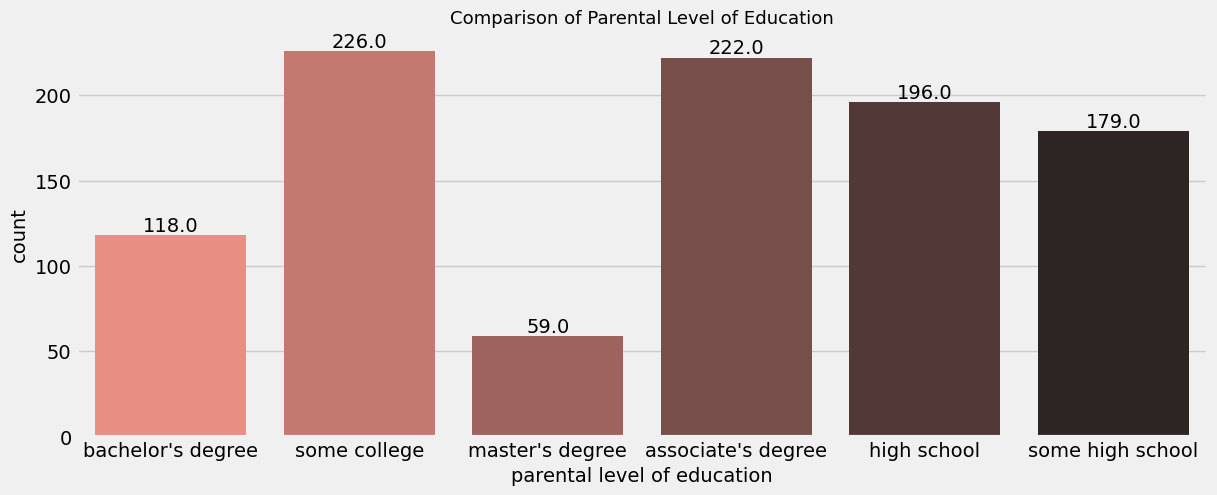

In [27]:
plt.rcParams['figure.figsize'] = (13, 5)
plt.style.use('fivethirtyeight')
ax = sns.countplot(data=df, x="parental level of education", palette="dark:salmon_r")
plt.title('Comparison of Parental Level of Education', fontweight=5, fontsize=13)

for p in ax.patches:
    ax.annotate(f'{p.get_height()}', (p.get_x() + p.get_width() / 2., p.get_height()), ha='center', va='bottom')

plt.show()

#### Insights 
- The highest number of parents are from some college followed by parents from associate's degree.

#### Is parental education has any impact on student's performance ?

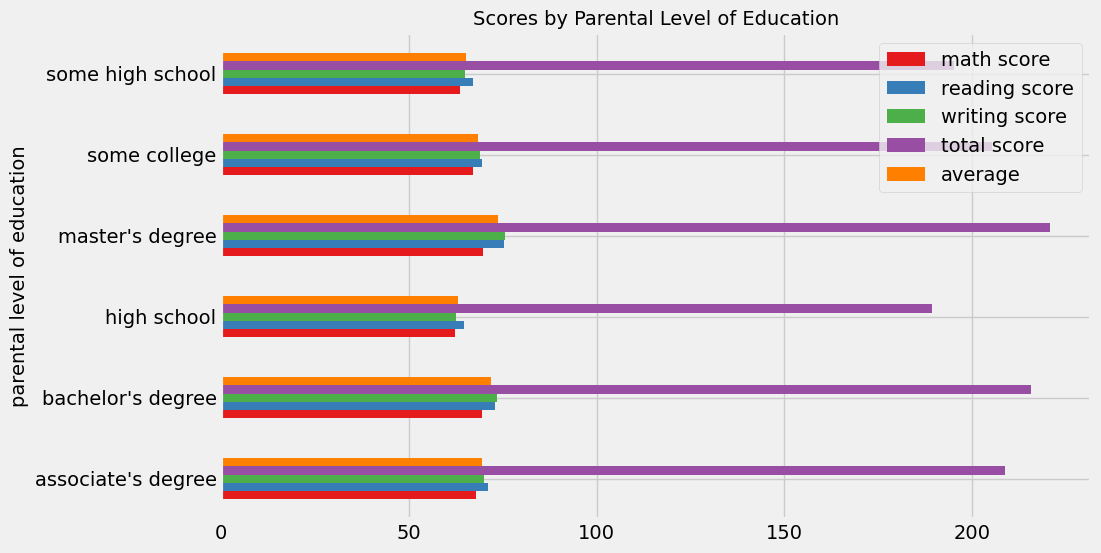

In [28]:
ax = df.groupby('parental level of education').agg('mean').plot(kind='barh', figsize=(10, 6), color=sns.color_palette("Set1"))

plt.title('Scores by Parental Level of Education', fontsize=14)
plt.show()

#### Insights 
- The score of student whose parents have master and bachelor's degree are higher than others.

#### Which type of lunch is most common amoung students ?

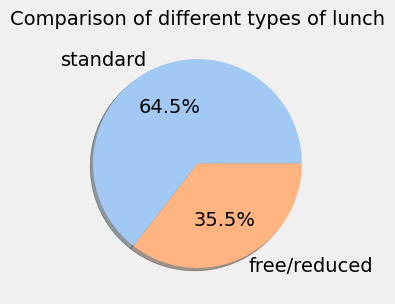

In [29]:
plt.rcParams['figure.figsize'] = (3, 4)
plt.pie(x=df['lunch'].value_counts(), labels=df['lunch'].value_counts().index, autopct='%1.1f%%', shadow=True, colors=sns.color_palette('pastel'))
plt.title('Comparison of different types of lunch', fontweight = 6, fontsize = 14)
plt.show()

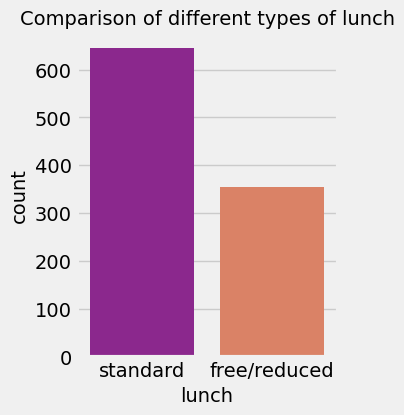

In [30]:
plt.rcParams['figure.figsize'] = (3, 4)
sns.countplot(df, x="lunch", palette='plasma')
plt.title('Comparison of different types of lunch', fontweight = 6, fontsize = 14)
plt.show()

#### Insights 
- The highest percentage belongs to students who receive Standard lunch

#### CHECKING OUTLIERS

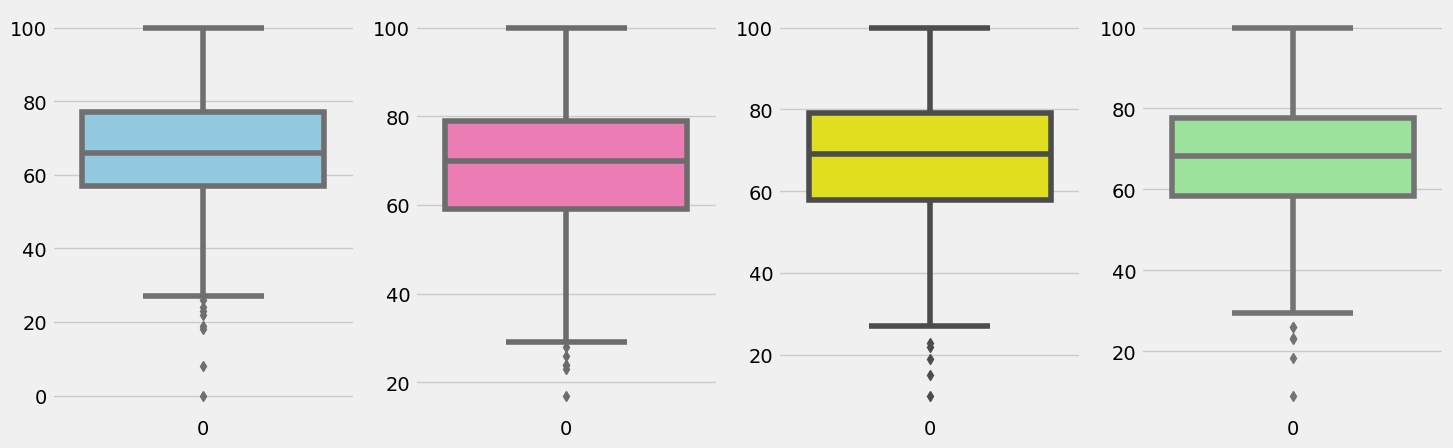

In [33]:
plt.subplots(1,4,figsize=(16,5))
plt.subplot(141)
sns.boxplot(df['math score'],color='skyblue')
plt.subplot(142)
sns.boxplot(df['reading score'],color='hotpink')
plt.subplot(143)
sns.boxplot(df['writing score'],color='yellow')
plt.subplot(144)
sns.boxplot(df['average'],color='lightgreen')
plt.show()

#### Plot pairwise relationships in the dataset

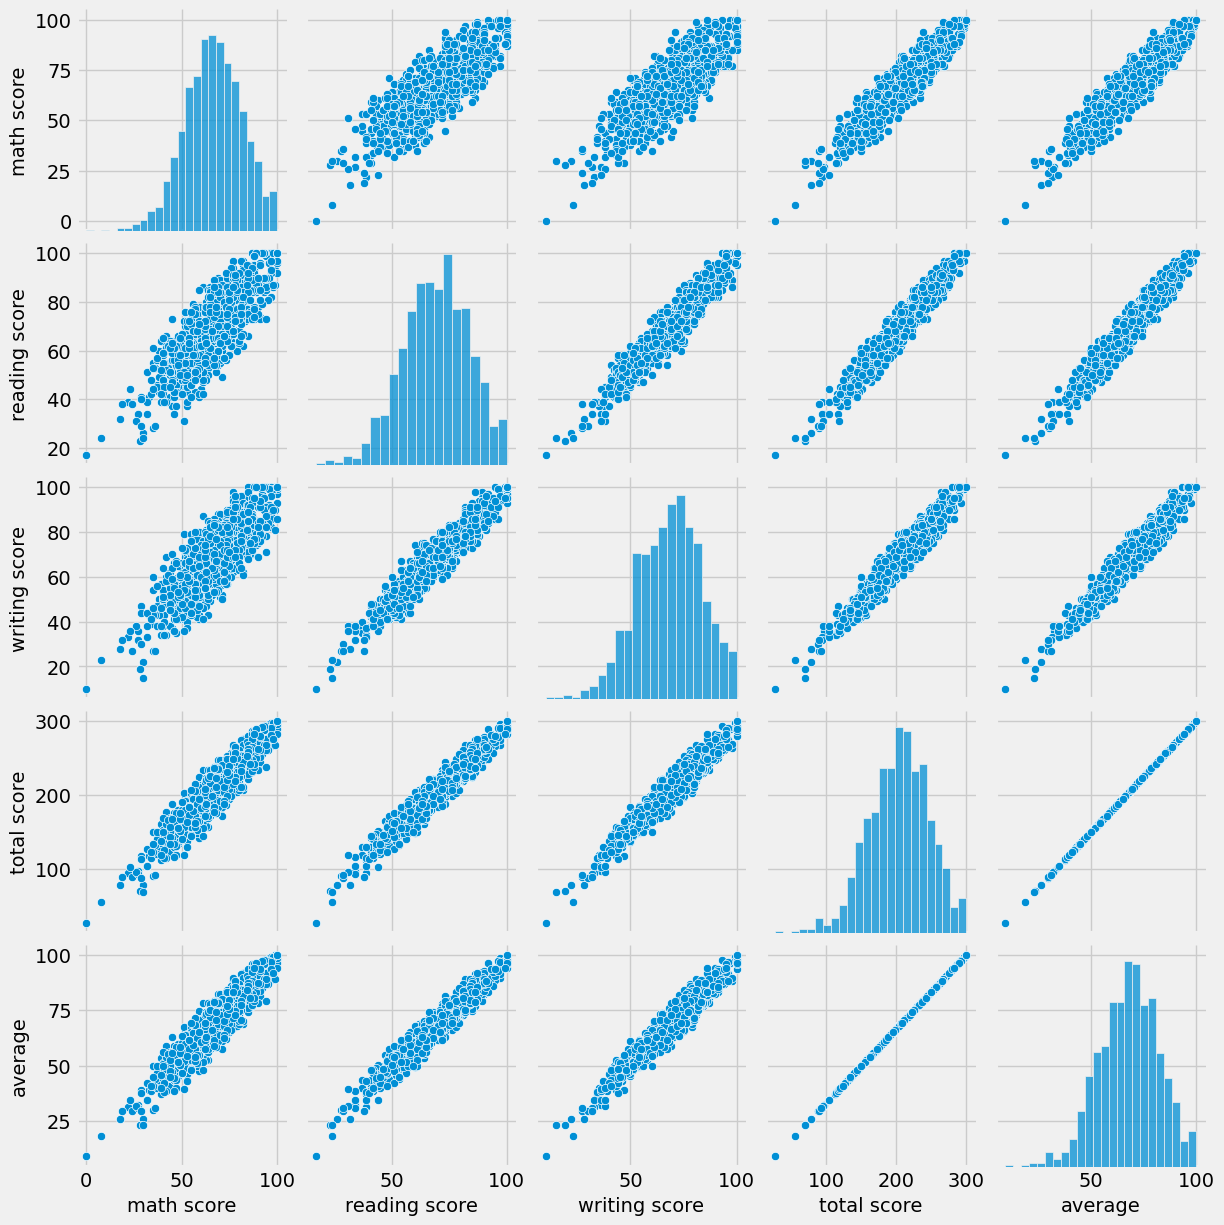

In [34]:
sns.pairplot(df)

#### Insights
- From the above plot it is clear that all the scores increase linearly with each other.

### 5/ Conclusions
- Student's Performance is related with lunch types that students receive
- Student's Performance is related with their parental level education and socioeconomic status
- Females are top-scorers